In [1]:
import pandas as pd
import re
from atus_analysis import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
merged = make_df()

In [5]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 419 entries, TUCASEID to t500107
dtypes: float64(1), int64(418)
memory usage: 36.5 MB


In [6]:
bike = merged[merged['t130104'] > 0]

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 253 to 11276
Columns: 419 entries, TUCASEID to t500107
dtypes: float64(1), int64(418)
memory usage: 223.1 KB


In [8]:
bike_data = merged.loc[:, ['tucaseid', 'TUFINLWGT', 't130104', 'GESTFIPS']]

In [9]:
bike_data['weighted_minutes'] = bike_data.TUFINLWGT * bike_data.t130104

In [10]:
bike_data.head()

,tucaseid,TUFINLWGT,t130104,GESTFIPS,weighted_minutes
0,20130101130004,11899905.662034,0,53,0
1,20130101130112,4447638.009513,0,48,0
2,20130101130123,10377056.507734,0,36,0
3,20130101130611,7731257.992805,0,12,0
4,20130101130616,4725269.227067,0,26,0


In [11]:
bike_data = bike_data.groupby('GESTFIPS').sum()

In [12]:
bike_data

,tucaseid,TUFINLWGT,t130104,weighted_minutes
GESTFIPS,,,,
1,3885214861216195,1.457791e+09,0,0.000000e+00
2,483136946150003,1.953890e+08,0,0.000000e+00
4,3744294535231536,1.682912e+09,130,7.467775e+08
5,2778022245998964,8.803334e+08,0,0.000000e+00
6,23492452314088172,1.029088e+10,770,4.888399e+09
8,4489135806191380,1.553559e+09,465,2.396818e+09
9,2939079145032704,9.646906e+08,60,4.623768e+08
10,764964244964846,3.291401e+08,0,0.000000e+00
11,644177593167070,2.027049e+08,60,1.801713e+08


In [13]:
bike_data["weighted_bike_minutes"] = bike_data["weighted_minutes"] / bike_data["TUFINLWGT"]

In [14]:
bike_data.head()

,tucaseid,TUFINLWGT,t130104,weighted_minutes,weighted_bike_minutes
GESTFIPS,,,,,
1,3885214861216195,1.457791e+09,0,0.000000e+00,0.000000
2,483136946150003,1.953890e+08,0,0.000000e+00,0.000000
4,3744294535231536,1.682912e+09,130,7.467775e+08,0.443741
5,2778022245998964,8.803334e+08,0,0.000000e+00,0.000000
6,23492452314088172,1.029088e+10,770,4.888399e+09,0.475022


In [15]:
bike_data.sort('weighted_bike_minutes', ascending=False)

,tucaseid,TUFINLWGT,t130104,weighted_minutes,weighted_bike_minutes
GESTFIPS,,,,,
8,4489135806191380,1.553559e+09,465,2.396818e+09,1.542792
44,764963942962128,3.751988e+08,30,4.855245e+08,1.294046
27,5334620211622485,1.868500e+09,490,2.302896e+09,1.232484
32,2013064273039120,7.045877e+08,180,7.667445e+08,1.088217
20,2778025241959349,1.042654e+09,170,1.034268e+09,0.991957
40,3120251611285451,1.013683e+09,60,9.470655e+08,0.934282
53,5213837499858716,1.911384e+09,215,1.711061e+09,0.895195
11,644177593167070,2.027049e+08,60,1.801713e+08,0.888835
30,845483759476588,3.000386e+08,90,2.541820e+08,0.847164


In [16]:
bike_data.index = bike_data.index.to_series().map(lambda code: replace_fips(code))

In [17]:
bike_data

,tucaseid,TUFINLWGT,t130104,weighted_minutes,weighted_bike_minutes
GESTFIPS,,,,,
AL,3885214861216195,1.457791e+09,0,0.000000e+00,0.000000
AK,483136946150003,1.953890e+08,0,0.000000e+00,0.000000
AZ,3744294535231536,1.682912e+09,130,7.467775e+08,0.443741
AR,2778022245998964,8.803334e+08,0,0.000000e+00,0.000000
CA,23492452314088172,1.029088e+10,770,4.888399e+09,0.475022
CO,4489135806191380,1.553559e+09,465,2.396818e+09,1.542792
CT,2939079145032704,9.646906e+08,60,4.623768e+08,0.479301
DE,764964244964846,3.291401e+08,0,0.000000e+00,0.000000
DC,644177593167070,2.027049e+08,60,1.801713e+08,0.888835


In [18]:
sorted_bike = bike_data.sort('weighted_bike_minutes', ascending=False)

In [19]:
sorted_bike.head()

,tucaseid,TUFINLWGT,t130104,weighted_minutes,weighted_bike_minutes
GESTFIPS,,,,,
CO,4489135806191380,1.553559e+09,465,2.396818e+09,1.542792
RI,764963942962128,3.751988e+08,30,4.855245e+08,1.294046
MN,5334620211622485,1.868500e+09,490,2.302896e+09,1.232484
NV,2013064273039120,7.045877e+08,180,7.667445e+08,1.088217
KS,2778025241959349,1.042654e+09,170,1.034268e+09,0.991957


In [20]:
top_10_bike = sorted_bike[0:10]

In [21]:
top_10_bike

,tucaseid,TUFINLWGT,t130104,weighted_minutes,weighted_bike_minutes
GESTFIPS,,,,,
CO,4489135806191380,1.553559e+09,465,2.396818e+09,1.542792
RI,764963942962128,3.751988e+08,30,4.855245e+08,1.294046
MN,5334620211622485,1.868500e+09,490,2.302896e+09,1.232484
NV,2013064273039120,7.045877e+08,180,7.667445e+08,1.088217
KS,2778025241959349,1.042654e+09,170,1.034268e+09,0.991957
OK,3120251611285451,1.013683e+09,60,9.470655e+08,0.934282
WA,5213837499858716,1.911384e+09,215,1.711061e+09,0.895195
DC,644177593167070,2.027049e+08,60,1.801713e+08,0.888835
MT,845483759476588,3.000386e+08,90,2.541820e+08,0.847164


In [22]:
sorted_bike_minutes = sorted_bike['weighted_bike_minutes']

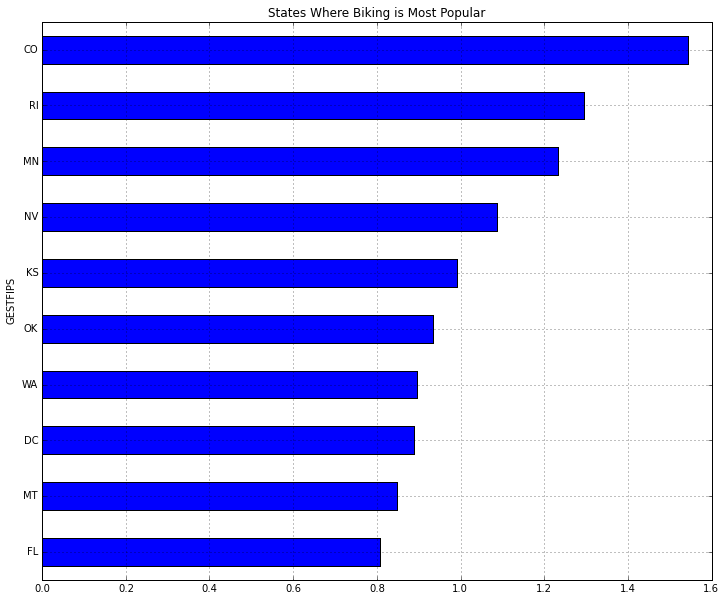

In [23]:
sorted_bike_minutes[9::-1].plot(kind = 'barh', figsize = (12, 10), 
                                title="States Where Biking is Most Popular")
plt.xlabel = "State"
plt.ylabel = "Weighted Average Minutes Biked Per Day"

In [24]:
running = make_averages_by_state(merged, 't130124')

In [25]:
running

GESTFIPS
HI    2.673735
VT    2.023781
AZ    1.970065
MD    1.683403
AK    1.623077
CA    1.622195
NJ    1.594257
MT    1.518553
AL    1.459095
IA    1.386597
Name: average_weighted_minutes, dtype: float64

In [ ]:
sorted_bike_minutes[9::-1].plot(kind = 'barh', figsize = (12, 10), 
                                title="States Where Running is Most Popular")
plt.xlabel = "State"
plt.ylabel = "Weighted Average Minutes Biked Per Day"